In [1]:
%matplotlib inline

In [2]:
from fgspectra import cross as fgc
from fgspectra import power as fgp
from fgspectra import frequency as fgf
import numpy as np
import matplotlib.pyplot as plt

## Initialize a Model

fgspectra makes it easy to build factorizable foreground models -- those that are separated into frequency and $\ell$-dependent parts. You just pass into `FactorizedCrossSpectrum` the SED and $C_{\ell}$ models, and get an object which behaves like the function you want.

In [3]:
tSZ = fgc.FactorizedCrossSpectrum(fgf.ThermalSZ(), fgp.tSZ_150_bat())

You can build these models interactively in the Python interpeter or Jupyter. Just `print()` the model, and it will tell you the input parameters.

In [4]:
print(tSZ)

FactorizedCrossSpectrum:
- ThermalSZ (SED):
    nu: null
    nu_0: null
- tSZ_150_bat (Cl):
    amp: 1.0
    ell: null
    ell_0: null



You call the `tSZ` with the SED arguments and the Cl arguments as a tuple. The arguments with default values are optional. Let's first leave all the default arguments in place:

In [5]:
freqs = np.array([150.0])
ells = np.array([150])
tSZ(
    {"nu": freqs, "nu_0": 150.0},  # SED parameters
    {"ell": ells, "ell_0": 150},  # Cl parameters
)

array([[[1.]]])

Now let's change some parameters. The parameters to each sub-model (i.e. SED or power spectrum) are passed as a tuple with the frequencies and ells. We set the spectrum to 1 at frequency `nu_0` -- let's change it to 50.

In [6]:
tSZ(
    {"nu": freqs, "nu_0": 50.0},  # SED parameters
    {"ell": ells, "ell_0": 150},  # Cl parameters
)

array([[[0.25921065]]])

Of course `fgspectra` is meant to generate spectra. Let's generate a frequency and ell cross spectrum -- just pass in larger arrays. The shape of the result array will be 

$$(\mathrm{freq}) \times (\mathrm{freq}) \times (\ell)$$.

In [7]:
freqs = np.array([150.0, 220.0])
ells = np.arange(3000)

spec = tSZ(
    {"nu": freqs, "nu_0": 150.0},  # SED parameters
    {"ell": ells, "ell_0": 150},  # Cl parameters
)

In [8]:
spec.shape

(2, 2, 3000)

Let's plot the different frequency cross spectra.

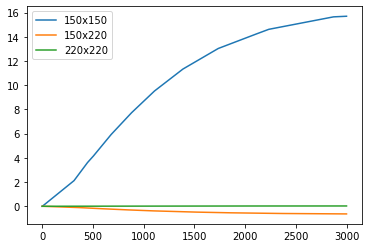

In [9]:
plt.plot(spec[0, 0], label="150x150")
plt.plot(spec[0, 1], label="150x220")
plt.plot(spec[1, 1], label="220x220")
plt.legend();